# 2016 US Bike Share Activity

## Table of Contents
- [Introduction](#intro)
- [Posing Questions](#pose_questions)
- [Data Collection and Wrangling](#wrangling)
  - [Condensing the Trip Data](#condensing)
- [Exploratory Data Analysis](#eda)
  - [Statistics](#statistics)
  - [Visualizations](#visualizations)
- [Performing Your Own Analysis](#eda_continued)
- [Conclusions](#conclusions)

<a id='intro'></a>
## Introduction

Over the past decade, bicycle-sharing systems have been growing in number and popularity in cities across the world. Bicycle-sharing systems allow users to rent bicycles for short trips, typically 30 minutes or less. Thanks to the rise in information technologies, it is easy for a user of the system to access a dock within the system to unlock or return bicycles. These technologies also provide a wealth of data that can be used to explore how these bike-sharing systems are used.

In this project, i will perform an exploratory analysis on data provided by [Motivate](https://www.motivateco.com/), a bike-share system provider for many major cities in the United States. i will compare the system usage between three large cities: New York City, Chicago, and Washington, DC. I will also see if there are any differences within each system for those users that are registered, regular users and those users that are short-term, casual users.

<a id='pose_questions'></a>
## Posing Questions

Before looking at the bike sharing data, i will start by asking questions i might want to understand about the bike share data. Consider, for example, if i were working for Motivate. What kinds of information would i want to know about in order to make smarter business decisions? If i were a user of the bike-share service, what factors might influence how  would want to use the service?

**Questions** 
#### 1. Is there a difference between the average trip per subscriber over the week vs over the weekend ?
#### 2. What is the average trip for customers?

<a id='wrangling'></a>
## Data Collection and Wrangling

Now it's time to collect and explore our data. In this project, we will focus on the record of individual trips taken in 2016 from our selected cities: New York City, Chicago, and Washington, DC. Each of these cities has a page where we can freely download the trip data.:

- New York City (Citi Bike): [Link](https://www.citibikenyc.com/system-data)
- Chicago (Divvy): [Link](https://www.divvybikes.com/system-data)
- Washington, DC (Capital Bikeshare): [Link](https://www.capitalbikeshare.com/system-data)

If you visit these pages, you will notice that each city has a different way of delivering its data. Chicago updates with new data twice a year, Washington DC is quarterly, and New York City is monthly. The data has already been collected in the `/data/` folder of the project files. While the original data for 2016 is spread among multiple files for each city, the files in the `/data/` folder collect all of the trip data for the year into one file per city. Some data wrangling of inconsistencies in timestamp format within each city has already been performed. In addition, a random 2% sample of the original data is taken to make the exploration more manageable. 

In [5]:
## import of all necessary packages and functions.
import csv # read and write csv files
from datetime import datetime # operations to parse dates
from pprint import pprint # use to print data structures like dictionaries in
                          # a nicer way than the base print function.

In [6]:
def print_first_point(filename):
    """
    This function prints and returns the first data point (second row) from
    a csv file that includes a header row.
    """
    # print city name for reference
    city = filename.split('-')[0].split('/')[-1]
    print('\nCity: {}'.format(city))
    
    with open(filename, 'r') as f_in:
        ## TODO: Use the csv library to set up a DictReader object. ##
        ## see https://docs.python.org/3/library/csv.html           ##
        
        
        trip_reader = csv.DictReader(f_in)
        
        
        ## TODO: Use a function on the DictReader object to read the     ##
        ## first trip from the data file and store it in a variable.     ##
        ## see https://docs.python.org/3/library/csv.html#reader-objects ##
        
        
        first_trip = next(trip_reader)
        
        
        ## TODO: Use the pprint library to print the first trip. ##
        ## see https://docs.python.org/3/library/pprint.html     ##
        
        
        pprint(first_trip)
        
        
    # output city name and first trip for later testing
    
    
    return (city, first_trip)


# list of files for each city


data_files = ['./data/NYC-CitiBike-2016.csv',
              './data/Chicago-Divvy-2016.csv',
              './data/Washington-CapitalBikeshare-2016.csv',]


# print the first trip from each file, store in dictionary


example_trips = {}
for data_file in data_files:
    city, first_trip = print_first_point(data_file)
    example_trips[city] = first_trip
    
    


City: NYC
OrderedDict([('tripduration', '839'),
             ('starttime', '1/1/2016 00:09:55'),
             ('stoptime', '1/1/2016 00:23:54'),
             ('start station id', '532'),
             ('start station name', 'S 5 Pl & S 4 St'),
             ('start station latitude', '40.710451'),
             ('start station longitude', '-73.960876'),
             ('end station id', '401'),
             ('end station name', 'Allen St & Rivington St'),
             ('end station latitude', '40.72019576'),
             ('end station longitude', '-73.98997825'),
             ('bikeid', '17109'),
             ('usertype', 'Customer'),
             ('birth year', ''),
             ('gender', '0')])

City: Chicago
OrderedDict([('trip_id', '9080545'),
             ('starttime', '3/31/2016 23:30'),
             ('stoptime', '3/31/2016 23:46'),
             ('bikeid', '2295'),
             ('tripduration', '926'),
             ('from_station_id', '156'),
             ('from_station_name', 'Clar

<a id='condensing'></a>
### Condensing the Trip Data

It should also be observable from the above printout that each city provides different information. Even where the information is the same, the column names and formats are sometimes different. To make things as simple as possible when we get to the actual exploration, we should trim and clean the data. Cleaning the data makes sure that the data formats across the cities are consistent, while trimming focuses only on the parts of the data we are most interested in to make the exploration easier to work with.

You will generate new data files with five values of interest for each trip: trip duration, starting month, starting hour, day of the week, and user type. Each of these may require additional wrangling depending on the city:

- **Duration**: This has been given to us in seconds (New York, Chicago) or milliseconds (Washington). A more natural unit of analysis will be if all the trip durations are given in terms of minutes.
- **Month**, **Hour**, **Day of Week**: Ridership volume is likely to change based on the season, time of day, and whether it is a weekday or weekend. Use the start time of the trip to obtain these values. The New York City data includes the seconds in their timestamps, while Washington and Chicago do not. The [`datetime`](https://docs.python.org/3/library/datetime.html) package will be very useful here to make the needed conversions.
- **User Type**: It is possible that users who are subscribed to a bike-share system will have different patterns of use compared to users who only have temporary passes. Washington divides its users into two types: 'Registered' for users with annual, monthly, and other longer-term subscriptions, and 'Casual', for users with 24-hour, 3-day, and other short-term passes. The New York and Chicago data uses 'Subscriber' and 'Customer' for these groups, respectively. For consistency, you will convert the Washington labels to match the other two.

In [7]:
def duration_in_mins(datum, city):
    """
    Takes as input a dictionary containing info about a single trip (datum) and
    its origin city (city) and returns the trip duration in units of minutes.
    
    Remember that Washington is in terms of milliseconds while Chicago and NYC
    are in terms of seconds. 
    
    HINT: The csv module reads in all of the data as strings, including numeric
    values. You will need a function to convert the strings into an appropriate
    numeric type when making your transformations.
    see https://docs.python.org/3/library/functions.html
    """
    
    # YOUR CODE HERE
    if city == 'Washington':
        duration = float(datum['Duration (ms)']) / 60000
    else:
        duration = float(datum['tripduration']) / 60    
        
    return duration


# Some tests to check that your code works. There should be no output if all of
# the assertions pass. The `example_trips` dictionary was obtained from when
# you printed the first trip from each of the original data files.
tests = {'NYC': 13.9833,
         'Chicago': 15.4333,
         'Washington': 7.1231}

for city in tests:
    assert abs(duration_in_mins(example_trips[city], city) - tests[city]) < .001

In [8]:
def time_of_trip(datum, city):
    """
    Takes as input a dictionary containing info about a single trip (datum) and
    its origin city (city) and returns the month, hour, and day of the week in
    which the trip was made.
    
    Remember that NYC includes seconds, while Washington and Chicago do not.
    
    HINT: You should use the datetime module to parse the original date
    strings into a format that is useful for extracting the desired information.
    see https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior
    """
    
    # YOUR CODE HERE
    from datetime import datetime

    if city == 'Washington':
        trip_date = datetime.strptime(datum['Start date'], "%m/%d/%Y %H:%M")
        
    elif city =='Chicago':
         trip_date = datetime.strptime(datum['starttime'], "%m/%d/%Y %H:%M")
        
    else:
        trip_date = datetime.strptime(datum['starttime'], "%m/%d/%Y %H:%M:%S")
                                         
    month = trip_date.month
    hour = trip_date.hour
    day_of_week = trip_date.strftime('%A')
    
    
    return (month, hour, day_of_week)


# Some tests to check that your code works. There should be no output if all of
# the assertions pass. The `example_trips` dictionary was obtained from when
# you printed the first trip from each of the original data files.
tests = {'NYC': (1, 0, 'Friday'),
         'Chicago': (3, 23, 'Thursday'),
         'Washington': (3, 22, 'Thursday')}

for city in tests:
    assert time_of_trip(example_trips[city], city) == tests[city]

In [9]:


def type_of_user(datum, city):
    
    
    """
    Takes as input a dictionary containing info about a single trip (datum) and
    its origin city (city) and returns the type of system user that made the
    trip.
    
    Remember that Washington has different category names compared to Chicago
    and NYC. 
    """
    
    
    # YOUR CODE HERE
    if city == 'Washington':    
        if datum['Member Type'] == 'Registered':
            user_type = 'Subscriber'
        elif datum['Member Type'] == 'Casual':
            user_type = 'Customer'
    else:
        user_type = datum['usertype']

    return user_type
    


# Some tests to check that your code works. There should be no output if all of
# the assertions pass. The `example_trips` dictionary was obtained from when
# you printed the first trip from each of the original data files.


tests = {'NYC': 'Customer',
         'Chicago': 'Subscriber',
         'Washington': 'Subscriber'}

for city in tests:
    assert type_of_user(example_trips[city], city) == tests[city]
    
    

Now, use the helper functions you wrote above to create a condensed data file for each city consisting only of the data fields indicated above. In the `/examples/` folder, you will see an example datafile from the [Bay Area Bike Share](http://www.bayareabikeshare.com/open-data) before and after conversion. Make sure that your output is formatted to be consistent with the example file.

In [10]:
def condense_data(in_file, out_file, city):
    """
    This function takes full data from the specified input file
    and writes the condensed data to a specified output file. The city
    argument determines how the input file will be parsed.
    
    HINT: See the cell below to see how the arguments are structured!
    """
    
    with open(out_file, 'w') as f_out, open(in_file, 'r') as f_in:
        # set up csv DictWriter object - writer requires column names for the
        # first row as the "fieldnames" argument
        out_colnames = ['duration', 'month', 'hour', 'day_of_week', 'user_type']        
        trip_writer = csv.DictWriter(f_out, fieldnames = out_colnames)
        trip_writer.writeheader()
        
        ## TODO: set up csv DictReader object ##
        trip_reader = csv.DictReader(f_in)

        # collect data from and process each row
        for row in trip_reader:
            # set up a dictionary to hold the values for the cleaned and trimmed
            # data point
            new_point = {}

            ## TODO: use the helper functions to get the cleaned data from  ##
            ## the original data dictionaries.                              ##
            ## Note that the keys for the new_point dictionary should match ##
            ## the column names set in the DictWriter object above.         ##
            
            month, hour, day_of_week = time_of_trip(row,city)
            new_point['duration'] = duration_in_mins(row,city)
            new_point['month'] = month
            new_point['hour'] = hour
            new_point['day_of_week'] = day_of_week
            new_point['user_type'] = type_of_user(row,city)
            

            ## TODO: write the processed information to the output file.     ##
            ## see https://docs.python.org/3/library/csv.html#writer-objects ##
            
            trip_writer.writerow(new_point)

In [11]:
# Run this cell to check your work
city_info = {'Washington': {'in_file': './data/Washington-CapitalBikeshare-2016.csv',
                            'out_file': './data/Washington-2016-Summary.csv'},
             'Chicago': {'in_file': './data/Chicago-Divvy-2016.csv',
                         'out_file': './data/Chicago-2016-Summary.csv'},
             'NYC': {'in_file': './data/NYC-CitiBike-2016.csv',
                     'out_file': './data/NYC-2016-Summary.csv'}}

for city, filenames in city_info.items():
    condense_data(filenames['in_file'], filenames['out_file'], city)
    print_first_point(filenames['out_file'])


City: Washington
OrderedDict([('duration', '7.123116666666666'),
             ('month', '3'),
             ('hour', '22'),
             ('day_of_week', 'Thursday'),
             ('user_type', 'Subscriber')])

City: Chicago
OrderedDict([('duration', '15.433333333333334'),
             ('month', '3'),
             ('hour', '23'),
             ('day_of_week', 'Thursday'),
             ('user_type', 'Subscriber')])

City: NYC
OrderedDict([('duration', '13.983333333333333'),
             ('month', '1'),
             ('hour', '0'),
             ('day_of_week', 'Friday'),
             ('user_type', 'Customer')])


<a id='eda'></a>
## Exploratory Data Analysis

Now that we have the data collected and wrangled, we're ready to start exploring the data. In this section i will write some code to compute descriptive statistics from the data. Will also use the `matplotlib` library to create some basic histograms of the data.

<a id='statistics'></a>
### Statistics

First, let's compute some basic counts. The first cell below contains a function that uses the csv module to iterate through a provided data file, returning the number of trips made by subscribers and customers. The second cell runs this function on the example Bay Area data in the `/examples/` folder. Modify the cells to answer the question below.

**Which city has the highest number of trips? Which city has the highest proportion of trips made by subscribers? Which city has the highest proportion of trips made by short-term customers?**

> Highest Number Of Trips = NYC = 276798 trip

> Highest Proportion Of trips made by  Subscribers for A City= NYC = 0.8883590199351151

> Highest proportion of trips made by Customers = Chicago = 0.23774798630269925

In [12]:
#define the number of trips function

def number_of_trips(filename):
    """
    This function reads in a file with trip data and reports the number of
    trips made by subscribers, customers, and total overall.
    """
    
    
    with open(filename) as f_in:
        
        
        # set up csv reader object
        
        
        reader = csv.DictReader(f_in)
        
        
        # setting storing names
        
        
        subscribers = 0
        customers = 0
        
        
        # storing 
        
        
        for row in reader:
            if row['user_type'] == 'Subscriber':
                subscribers += 1
            else:
                customers += 1
                
        
        # calculating total 
        
        
        total = subscribers + customers
        
        
        return(subscribers, customers, total)
    
    

In [13]:
## Modify this and the previous cell to answer Question 4a. Remember to run ##
## the function on the cleaned data files you created from Question 3.      ##


city_info = {'Washington': './data/Washington-2016-Summary.csv',
             'Chicago': './data/Chicago-2016-Summary.csv',
             'NYC': './data/NYC-2016-Summary.csv'}

for city, filename in city_info.items():
    subscribers, customers, total = number_of_trips(filename)
    
    #subscribers proportion
    subscribers_proportion = subscribers/total
    
    #subscribers percentage
    subscribers_percentage = round(float(subscribers_proportion) * 100, 2 )
    
    #customers proportion
    customers_proportion = customers/total
    
    #cystomers percentage
    customers_percentage = round(float(customers_proportion) * 100, 2)
    
    print('City: {}'.format(city))
    print('Total number of  trips: {} .'.format(total))
    print('Proportion of trips made by subscribers: {} .'.format(subscribers_proportion))
    print('Percentage of trips made by Subscribers: {}% .'.format(subscribers_percentage))
    print('Proportion  of trips made by customers: {} .'.format(customers_proportion))
    print('Percentage of trips made by Customers: {}% .\n'.format(customers_percentage))

    

City: Washington
Total number of  trips: 66326 .
Proportion of trips made by subscribers: 0.7802822422579381 .
Percentage of trips made by Subscribers: 78.03% .
Proportion  of trips made by customers: 0.21971775774206193 .
Percentage of trips made by Customers: 21.97% .

City: Chicago
Total number of  trips: 72131 .
Proportion of trips made by subscribers: 0.7622520136973008 .
Percentage of trips made by Subscribers: 76.23% .
Proportion  of trips made by customers: 0.23774798630269925 .
Percentage of trips made by Customers: 23.77% .

City: NYC
Total number of  trips: 276798 .
Proportion of trips made by subscribers: 0.8883590199351151 .
Percentage of trips made by Subscribers: 88.84% .
Proportion  of trips made by customers: 0.11164098006488486 .
Percentage of trips made by Customers: 11.16% .



 Bike-share systems are designed for riders to take short trips. Most of the time, users are allowed to take trips of 30 minutes or less with no additional charges, with overage charges made for trips of longer than that duration. What is the average trip length for each city? What proportion of rides made in each city are longer than 30 minutes?

**Answer**: 

>**City: NYC**
>
>**Average trip is : 15.81 minutes.
>Percentage of trips longer than 30 minutes: 7.3 % .
>Prportion of trips longer than 30 minutes: 0.07 .**

>**City: Chicago**
>
>**Average trip is : 16.56 minutes.
>Percentage of trips longer than 30 minutes: 8.33 % .
>Prportion of trips longer than 30 minutes: 0.08 .**

>**City: Washington**
>
>**Average trip is : 18.93 minutes.
>Percentage of trips longer than 30 minutes: 10.84 % .
>Prportion of trips longer than 30 minutes: 0.11 .**

In [14]:
## Use this and additional cells to answer Question 4b.                 ##
##                                                                      ##
## HINT: The csv module reads in all of the data as strings, including  ##
## numeric values. You will need a function to convert the strings      ##
## into an appropriate numeric type before you aggregate data.          ##
## TIP: For the Bay Area example, the average trip length is 14 minutes ##
## and 3.5% of trips are longer than 30 minutes.                        ##

def average_duration(filename):
    '''
    a function to calculate the percentage of trips that are longer than 30 minutes and the total
    
    '''
    with open(filename, 'r') as f_in:
        reader = csv.DictReader(f_in)
        
        # to store trips amount
        trips_amount = 0 
        
        # to store number of trips longer than 30 minutes
        more_than_30 = 0 
        
        # to store total length of trips
        total_durations= 0 

        for row in reader:
            
            #this sums the total trips durations
            total_durations += float(row['duration'])
            
            
            if float(row['duration']) > 30:
                
                #this will store how many trips longer than 30 minutes
                more_than_30 += 1
                
            #this will store sum of total trips number
            trips_amount += 1
            
        #average minutes of a trip    
        average_trip = round(float(total_durations / trips_amount), 2)
        
        #percentage of trips longer than 30 to the whole count of trips
        percentage_30 = round(float(more_than_30 / trips_amount * 100), 2)
        proportion_30 = round(float(more_than_30 / trips_amount), 2)
        return (average_trip , percentage_30, proportion_30  )
    
    

In [15]:

# Test


city_data = {"NYC":"./data/NYC-2016-Summary.csv", "Chicago":"./data/Chicago-2016-Summary.csv", "Washington":"./data/Washington-2016-Summary.csv"}

for city, filename in city_data.items():
    average_trip, percentage_30, proportion_30 = average_duration(filename)
    
    
    print('City: {}'.format(city))
    print('Average trip is : {} minutes.'.format(average_trip))
    print('Percentage of trips longer than 30 minutes: {} % .'.format(percentage_30))
    print('Prportion of trips longer than 30 minutes: {} .\n'.format(proportion_30))

City: NYC
Average trip is : 15.81 minutes.
Percentage of trips longer than 30 minutes: 7.3 % .
Prportion of trips longer than 30 minutes: 0.07 .

City: Chicago
Average trip is : 16.56 minutes.
Percentage of trips longer than 30 minutes: 8.33 % .
Prportion of trips longer than 30 minutes: 0.08 .

City: Washington
Average trip is : 18.93 minutes.
Percentage of trips longer than 30 minutes: 10.84 % .
Prportion of trips longer than 30 minutes: 0.11 .



**i wanted to see the average difference between a customer trip and a subscriber trip in Washnigton.**

**Washington**

**Subscribers average trip is 12.53 minutes**

**Customers average trip is 41.68 minutes**

In [16]:
## Use this and additional cells to answer Question 4c. If you have    ##
## not done so yet, consider revising some of your previous code to    ##
## make use of functions for reusability.                              ##
##                                                                     ##
## TIP: For the Bay Area example data, you should find the average     ##
## Subscriber trip duration to be 9.5 minutes and the average Customer ##
## trip duration to be 54.6 minutes. Do the other cities have this     ##
## level of difference?  


def average_user(filename):
    
    with open(filename, 'r') as f_in:
        reader = csv.DictReader(f_in)

        #subscribers duration of a trip
        subscriber_duration = 0
        
        #count number of trips made by subscribers
        subscriber_amount = 0     
        
        #customers duration of a  trip
        customer_duration = 0  
        
        #count of customer trips
        customer_amount = 0   
        
        #to store the average duration of a subscribers trip
        average_duration_subscriber = 0
        
        #to store average duration of a customers trip
        average_duration_customer = 0
 
        for row in reader:
            if row['user_type'] == "Subscriber":
                subscriber_amount += 1
                subscriber_duration += float(row['duration'])
            else:
                customer_amount += 1
                customer_duration += float(row['duration'])
        average_duration_subscriber = round( subscriber_duration / subscriber_amount, 2)
        average_duration_customer = round (customer_duration / customer_amount ,2) 
        return (average_duration_subscriber, average_duration_customer)  

In [17]:
city_data = {"Washington" : "./data/Washington-2016-Summary.csv"}

for city, filename in city_data.items():
    average_duration_subscriber, average_duration_customer = average_user(filename)
print(city)
print("Subscribers average trip is {} minutes ".format(average_duration_subscriber))
print("Customers average trip is {} minutes\n".format(average_duration_customer))

Washington
Subscribers average trip is 12.53 minutes 
Customers average trip is 41.68 minutes



<a id='visualizations'></a>
### Visualizations

The last set of values computed should have pulled up an interesting result. While the mean trip time for Subscribers is well under 30 minutes, the mean trip time for Customers is actually _above_ 30 minutes! It will be interesting for us to look at how the trip times are distributed. In order to do this, a new library will be introduced here, `matplotlib`. 

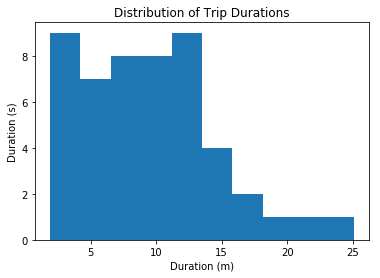

In [18]:
# load library
import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly.graph_objs as go
# this is a 'magic word' that allows for plots to be displayed
# inline with the notebook. If you want to know more, see:
# http://ipython.readthedocs.io/en/stable/interactive/magics.html
%matplotlib inline 

# example histogram, data taken from bay area sample
data = [ 7.65,  8.92,  7.42,  5.50, 16.17,  4.20,  8.98,  9.62, 11.48, 14.33,
        19.02, 21.53,  3.90,  7.97,  2.62,  2.67,  3.08, 14.40, 12.90,  7.83,
        25.12,  8.30,  4.93, 12.43, 10.60,  6.17, 10.88,  4.78, 15.15,  3.53,
         9.43, 13.32, 11.72,  9.85,  5.22, 15.10,  3.95,  3.17,  8.78,  1.88,
         4.55, 12.68, 12.38,  9.78,  7.63,  6.45, 17.38, 11.90, 11.52,  8.63,]
plt.hist(data)
plt.title('Distribution of Trip Durations')
plt.xlabel('Duration (m)')
plt.ylabel('Duration (s)')
plt.show()

In [19]:
import numpy as np

x = np.random.randn(500)
data2 = [go.Histogram(x=x)]

py.iplot(data2, filename='basic histogram')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~alryshythm/0 or inside your plot.ly account where it is named 'basic histogram'


In [20]:
## Use this and additional cells to collect all of the trip times as a list ##
## and then use pyplot functions to generate a histogram of trip times.     ##

import matplotlib.pyplot as plt
%matplotlib inline 

def histogram_creator(data):
    with open(data,'r') as f_in:
        reader = csv.DictReader(f_in)
        info = []
        for row in reader:
            info.append(float(row['duration']))
        return info

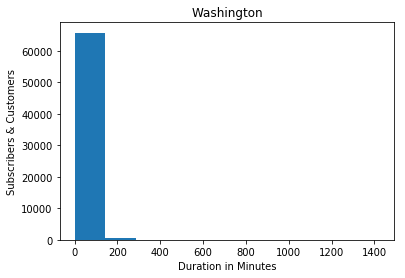

In [21]:

data = './data/Washington-2016-Summary.csv'
plt.hist(histogram_creator(data)) 
plt.title(city)
plt.xlabel('Duration in Minutes')
plt.ylabel('Subscribers & Customers')
plt.show()


 Using the parameters of the `.hist()` function to plot the distribution of trip times for the Subscribers in our selected city. We'll do the same thing for only the Customers. Add limit to the plots so that only trips of duration less than 75 minutes are plotted. 


**Washington Subscribers:** : Peak lies between a 5-10 minutes and since the tail is to the right the shape is Right Skewed.

**Washington Customers:** Peak lies between the 15-20 minutes bin and it is less skewed than the subscribers graph but still it is Right Skewed.

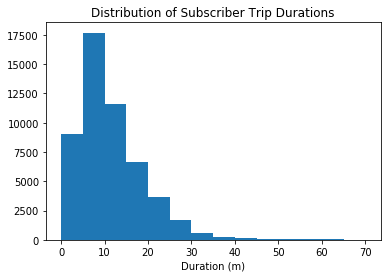

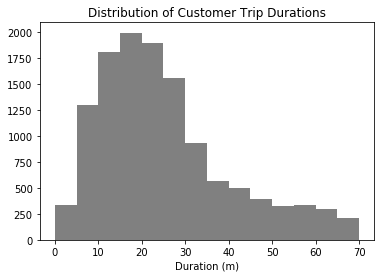

In [24]:
import matplotlib.pyplot as plt

%matplotlib inline

#store subscribers durations
subscribers_duration = []

#store customers durations
customers_duration = []


filename = './data/Washington-2016-Summary.csv'


with open(filename, 'r') as f_in:
    
    
        # set up csv reader object
        reader = csv.DictReader(f_in)
        
        
        for row in reader:
            if row['user_type'] == 'Subscriber':
                subscribers_duration.append(float(row['duration']))
            else:
                customers_duration.append(float(row['duration']))
                
                
plt.hist(subscribers_duration, range=(0,75),bins=range(0,75,5))
plt.title('Distribution of Subscriber Trip Durations')
plt.xlabel('Duration (m)')
plt.show()

plt.hist(customers_duration, range=(0,75), bins=range(0,75,5), color = 'gray' )
plt.title('Distribution of Customer Trip Durations')
plt.xlabel('Duration (m)')
plt.show()

<a id='eda_continued'></a>
## More Analysis

**i made an ssumption that customers/ non subscribers who rent a bike tend to rent it for longer intervals than 30 minutes.
the bar graphs show that clearly especially when we pass the 50 minutes mark.**
i also tried the describe pandas function. and this was the outcome.

**count    66326.000000**

**mean        18.932874**

**std         39.661080**

**min          1.010550**

**25%          6.766708**

**50%         11.517492**

**75%         19.543046**

**max       1422.516367**


In [25]:
## Use this and additional cells to continue to explore the dataset. ##
## Once you have performed your exploration, document your findings  ##
## in the Markdown cell above.##

import pandas as pd
import numpy as np

source = pd.read_csv('./data/Washington-2016-Summary.csv') 
description = source['duration']
description.describe()

count    66326.000000
mean        18.932874
std         39.661080
min          1.010550
25%          6.766708
50%         11.517492
75%         19.543046
max       1422.516367
Name: duration, dtype: float64

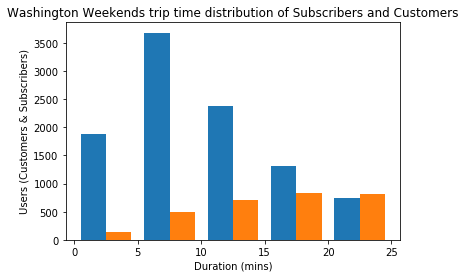

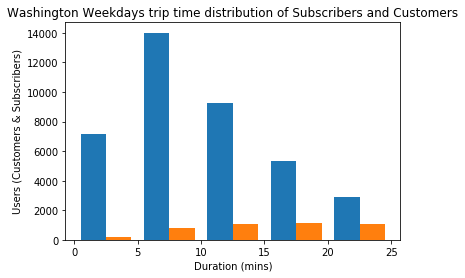

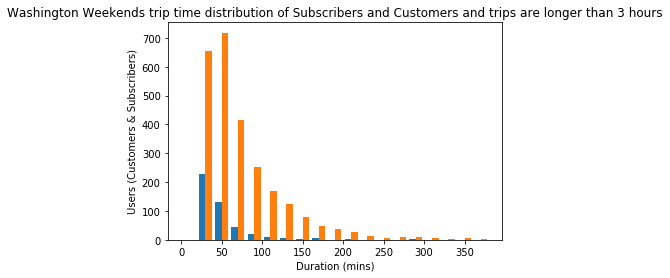

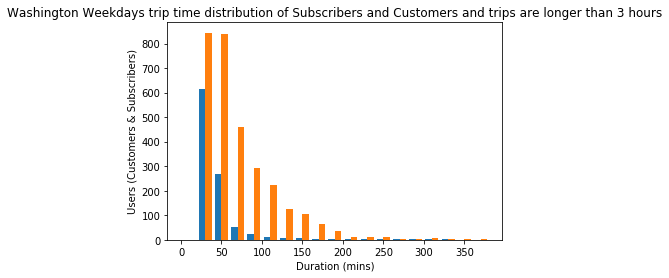

In [26]:
## Use this and additional cells to continue to explore the dataset. ##
## Once you have performed your exploration, document your findings  ##
## in the Markdown cell above.      ##

city_info = {'Washington' : './data/Washington-2016-Summary.csv'}

for city in city_info:
    with open(city_info[city],'r') as f_in:
        reader = csv.DictReader(f_in)
        
        #store duration of trips for subscribers in weekends
        weekends_subscribers = []
        #store weekend subscriber trips longer than 30 minutes
        weekends_subscribers_3 = []
        
        #store durations of trips for subscribers in weekdays
        weekdays_subscribers = []
        #store weekday subscriber trips longer than 30 minutes
        weekdays_subscribers_3 = []
        
        #stores durations of trips for customers in weekends
        weekends_customers = []
        #store weeKend customer trips longer than 30 miutes
        weekends_customers_3 = []

        #stores durations of trips for customers on weekdays 
        weekdays_customers = []
        #store weekdays longer than 30 minutes
        weekdays_customers_3 = []
        
        
        for row in reader:
            
            duration = float(row['duration'])
            if float(row['duration']) >= 30 :
            
                if row['user_type'] == 'Subscriber':
                    if row['day_of_week'] == 'Sunday' or row['day_of_week'] == 'Saturday':
                        weekends_subscribers_3.append(duration)
                    else:
                        weekdays_subscribers_3.append(duration)
                else:
                    if row['day_of_week'] == 'Saturday' or row['day_of_week'] == 'Sunday':
                        weekends_customers_3.append(duration)
                    else:
                        weekdays_customers_3.append(duration)
                        
            else :
                if row['user_type'] == 'Subscriber':
                    if row['day_of_week'] == 'Sunday' or row['day_of_week'] == 'Saturday':
                        weekends_subscribers.append(duration)
                    else:
                        weekdays_subscribers.append(duration)
                else: 
                    if row['day_of_week'] == 'Saturday' or row['day_of_week'] == 'Sunday':
                        weekends_customers.append(duration)
                    else:
                        weekdays_customers.append(duration)
                    
                    
#store both subscribers and customers weekends            
weekends = [weekends_subscribers, weekends_customers]
weekends_3 = [weekends_subscribers_3, weekends_customers_3]

#store both subscribers and customers weekdays
weekdays = [weekdays_subscribers, weekdays_customers]
weekdays_3 = [weekdays_subscribers_3, weekdays_customers_3]

plt.hist(weekends, range=(0,30),bins=range(0,30,5))
plt.xlabel('Duration (mins)')
plt.ylabel('Users (Customers & Subscribers)')
plt.title( city + ' Weekends trip time distribution of Subscribers and Customers')
plt.show()

plt.hist(weekdays, range=(0,30),bins=range(0,30,5))
plt.xlabel('Duration (mins)')
plt.ylabel('Users (Customers & Subscribers)')
plt.title( city + ' Weekdays trip time distribution of Subscribers and Customers')
plt.show()

plt.hist(weekends_3, range=(30,400),bins=range(0,400,20))
plt.xlabel('Duration (mins)')
plt.ylabel('Users (Customers & Subscribers)')
plt.title( city + ' Weekends trip time distribution of Subscribers and Customers and trips are longer than 3 hours')
plt.show()

plt.hist(weekdays_3, range=(30,400),bins=range(0,400,20))
plt.xlabel('Duration (mins)')
plt.ylabel('Users (Customers & Subscribers)')
plt.title( city + ' Weekdays trip time distribution of Subscribers and Customers and trips are longer than 3 hours')
plt.show()

In [27]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Bike_Share_Analysisiii.ipynb'])

255